Rapport Smart Cities
====================
Building Thermal Model
---------------------

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem

Dimensions of the problem

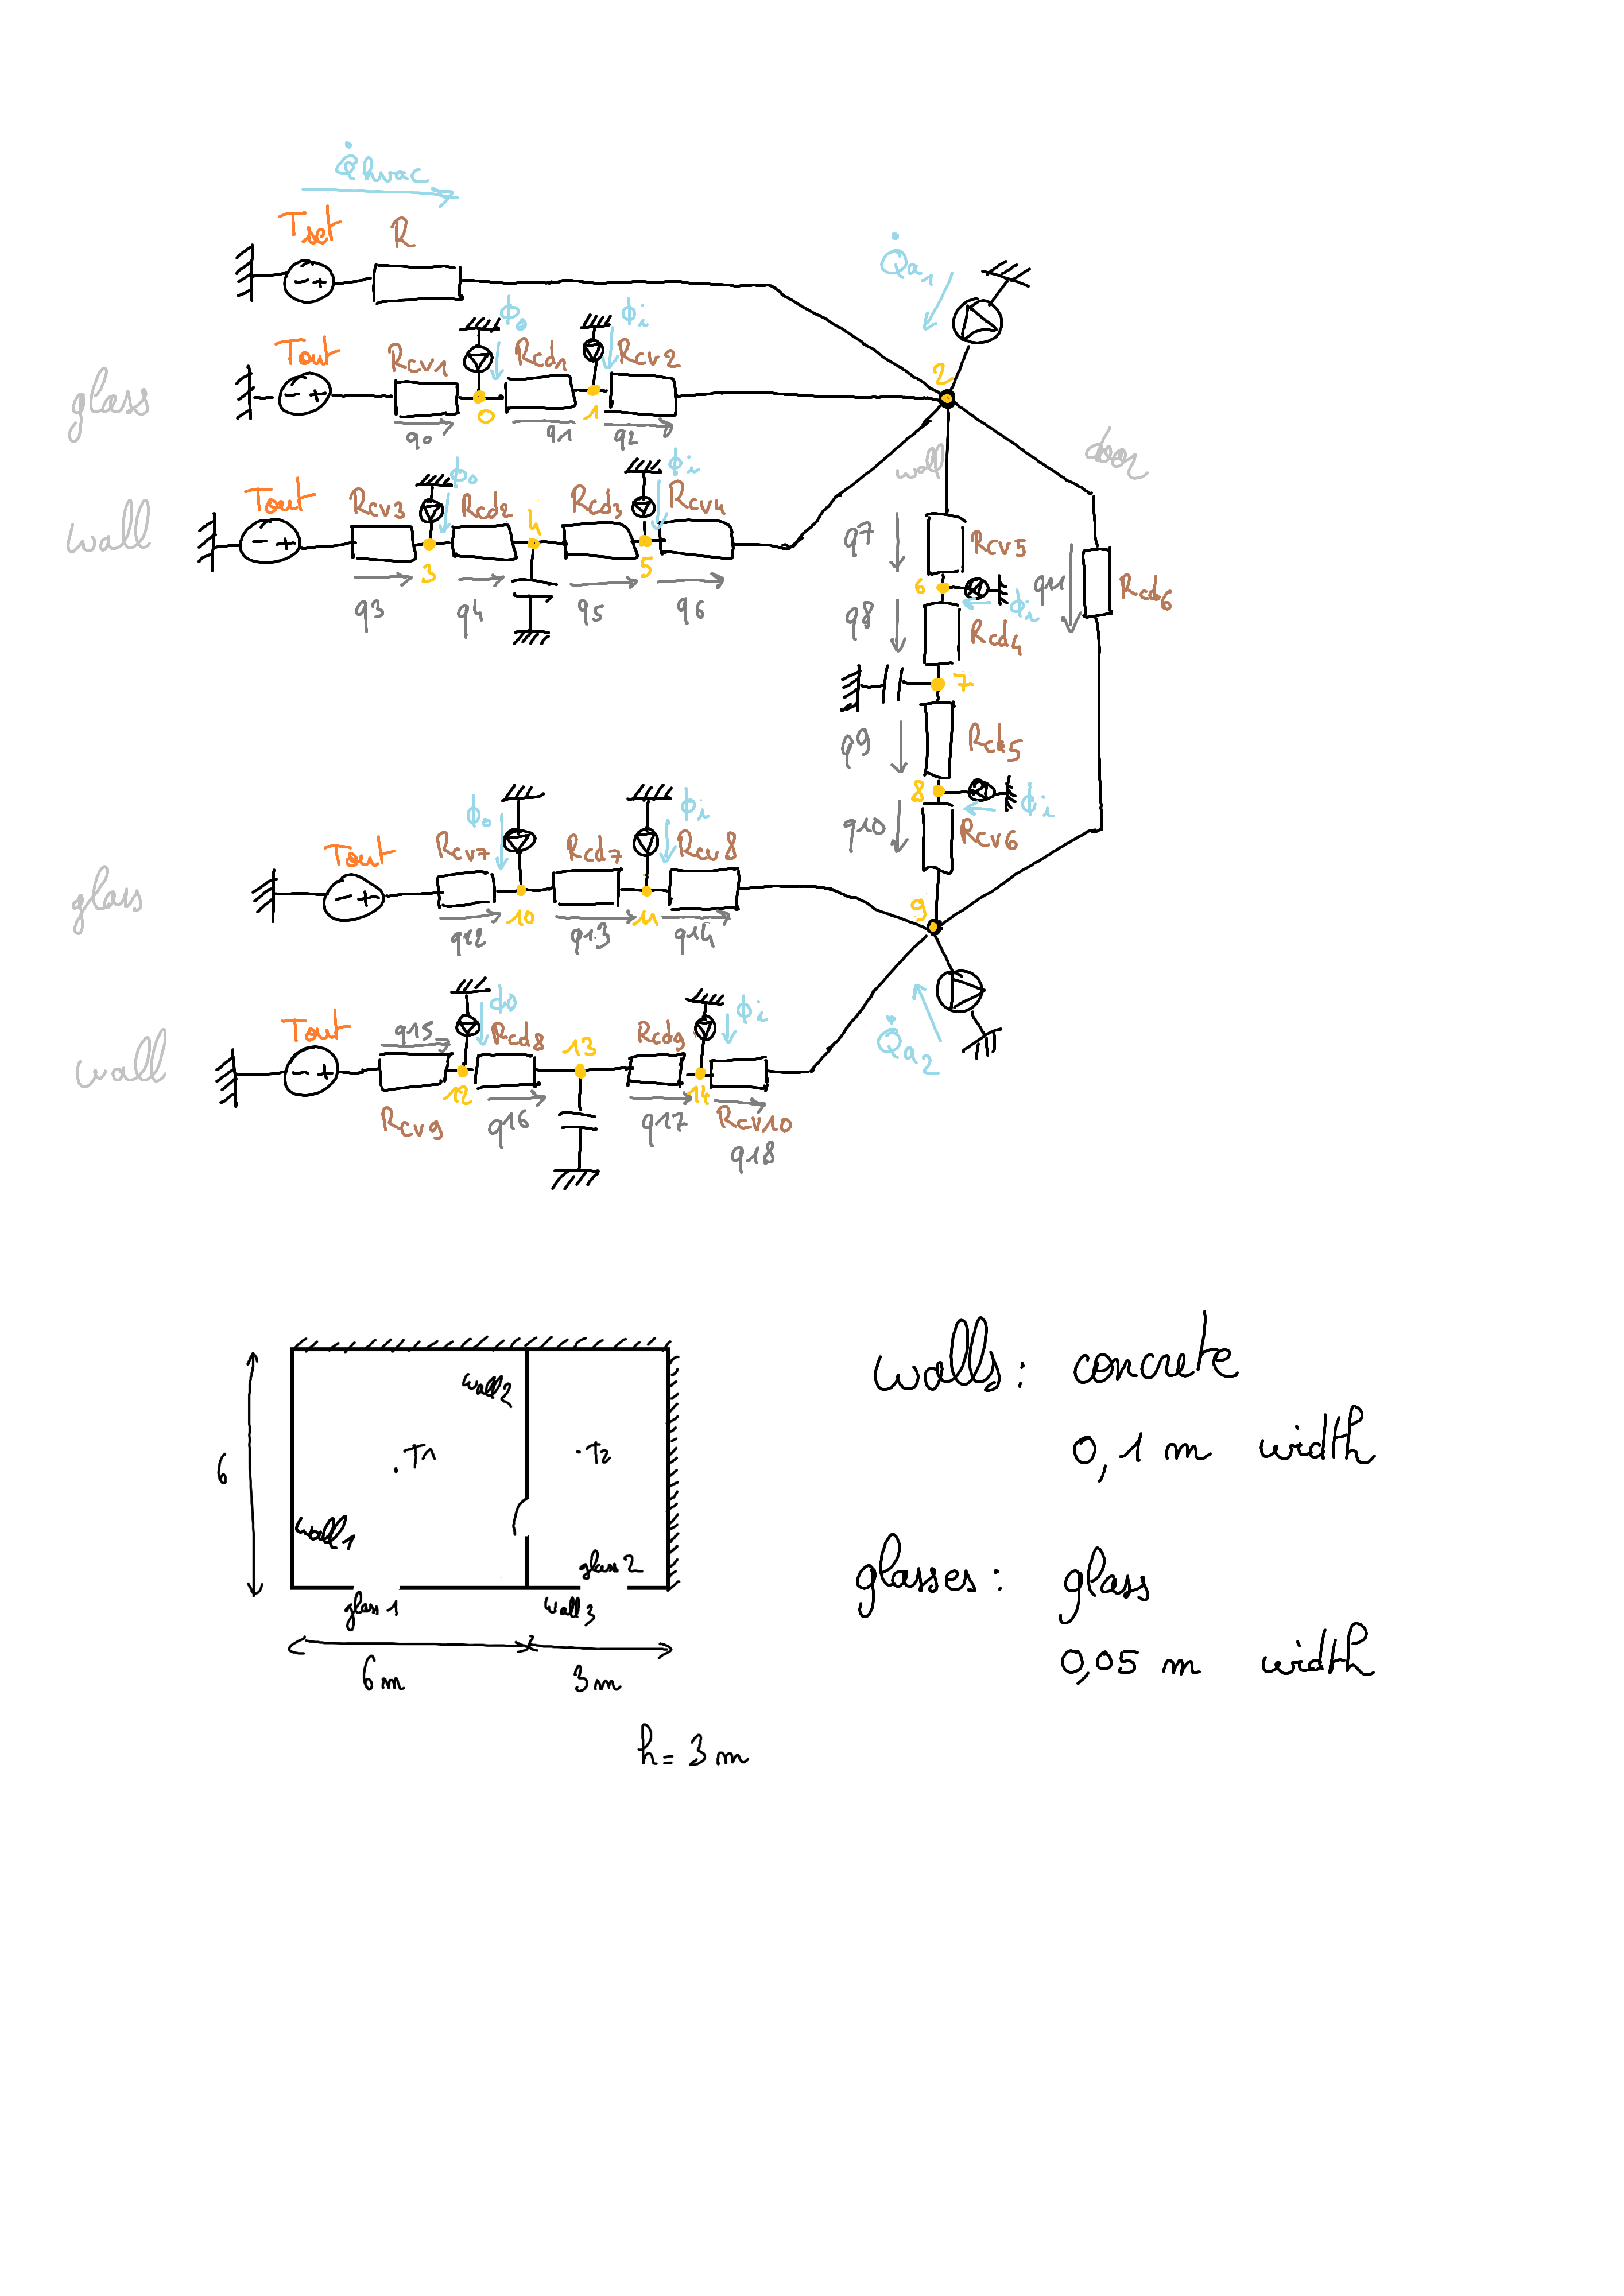

In [367]:
H = 3 #height of the room
L_1 = 12
L_2 = 6 
L_3 = 3 
L_g = 1 

L_door = 1
H_door = 2

S_glass = L_g**2
S_door = L_door * H_door
S_wall1 = L_1*H
S_wall2 = L_2*H
S_wall3 = L_3*H

print(S_wall1, S_wall2, S_wall3)

36 18 9


Thermal properties of the model

In [368]:
air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/(kg·K)
# pd.DataFrame.from_dict(air, orient='index', columns=['air'])
pd.DataFrame(air, index=['Air'])

,Density,Specific heat
Air,1.2,1000


In [369]:
concrete = {'Conductivity': 1.400,
            'Density': 2300.0,
            'Specific heat': 880,
            'Width': 0.1}


glass = {'Conductivity': 1,
         'Density': 2500,
         'Specific heat': 1210,
         'Width': 0.05}

wood = {'Conductivity': 0.17,
         'Density': 500,
         'Specific heat': 2500,
         'Width': 0.07}

wall = pd.DataFrame.from_dict({'Wall': concrete,
                               'Glass': glass},
                              orient='index')
wall

,Conductivity,Density,Specific heat,Width
Wall,1.4,2300.0,880,0.10
Glass,1.0,2500.0,1210,0.05


Radiative properties

In [370]:
# radiative properties
ε_wLW = 0.85    # long wave emmisivity: wall surface (concrete)
ε_gLW = 0.90    # long wave emmisivity: glass pyrex
α_wSW = 0.25    # short wave absortivity: white smooth surface
α_gSW = 0.38    # short wave absortivity: reflective blue glass
τ_gSW = 0.30    # short wave transmitance: reflective blue glass

σ = 5.67e-8     # W/(m²⋅K⁴) Stefan-Bolzmann constant
print(f'σ = {σ} W/(m²⋅K⁴)')

σ = 5.67e-08 W/(m²⋅K⁴)


Convection coefficients

In [371]:
convection_coeff = {'h_in': 4,
                    'h_out': 10}


Conductances for conduction

In [372]:
G_cd1 = (glass['Conductivity']*S_glass)/glass['Width']

G_cd2 = G_cd3 = ((concrete['Conductivity']*S_wall1)/concrete['Width'])*0.5
G_cd4 = G_cd5 = ((concrete['Conductivity']*S_wall2)/concrete['Width'])*0.5

G_cd6 = ((wood['Conductivity']*S_door)/wood['Width'])

G_cd9 = G_cd8 = ((concrete['Conductivity']*S_wall3)/concrete['Width'])*0.5

G_cd7 = (glass['Conductivity']*S_glass)/glass['Width']

Conductances for convection

In [373]:
G_cv1 = S_glass * convection_coeff['h_out']
G_cv2 = S_glass * convection_coeff['h_in']

G_cv3 = S_wall1 * convection_coeff['h_out']
G_cv4 = S_wall1 * convection_coeff['h_in']

G_cv5 = G_cv6 = S_wall2 * convection_coeff['h_in']

G_cv7 = S_glass * convection_coeff['h_out']
G_cv8 = S_glass * convection_coeff['h_in']

G_cv9 = S_wall3 * convection_coeff['h_out']
G_cv10 = S_wall3 * convection_coeff['h_in']

Conductances for Advection

In [374]:
Va_1 = (L_2**2) * H  #volume of air in room 1 
Va_2 = L_2 * L_3 * H #volume of air in room 2 
ACH = 1 # 1 volume changed per hour

G_adv1 = air['Specific heat'] * air['Density'] * ((ACH * Va_1)/3600)
G_adv2 = air['Specific heat'] * air['Density'] * ((ACH * Va_2)/3600)

Wall Capacities

In [375]:
C_wall1 = S_wall1 * concrete['Density'] * concrete['Width'] * concrete['Specific heat']
C_wall2 = S_wall2 * concrete['Density'] * concrete['Width'] * concrete['Specific heat']
C_wall3 = S_wall3 * concrete['Density'] * concrete['Width'] * concrete['Specific heat']

Index Matrix A

In [376]:
N_nodes = 15
N_flows = 20

A = np.zeros([N_flows,N_nodes])

A[0,0] = A[1,1] = A[2,2] = A[3,3] = A[4,4] = A[5,5] = A[7,6] = A[8,7] = A[9,8] = A[10,9] = A[11,9] = A[12,10] = A[13,11] = A[15,12] = A[16,13] = A[17,14] = A[6,2] = A[19,2] = A[14,9] = A[18,9] = 1
A[1,0] = A[2,1] =  A[4,3] = A[5,4] = A[6,5] = A[7,2] = A[8,6] = A[9,7] = A[10,8] = A[11,2] = A[13,10] = A[14,11] = A[16,12] = A[17,13] = A[18,14] = -1
print (A)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0. -1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.]

 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0

Conductance Matrix G

In [377]:
G = np.zeros([N_flows,N_flows])

G[0,0] = G_cv1
G[1,1] = G_cd1
G[2,2] = G_cv2
G[3,3] = G_cv3
G[4,4] = G_cd2
G[5,5] = G_cd3
G[6,6] = G_cv4
G[7,7] = G_cv5
G[8,8] = G_cd4
G[9,9] = G_cd5
G[10,10] = G_cv6
G[11,11] = G_cd6
G[12,12] = G_cv7
G[13,13] = G_cd7
G[14,14] = G_cv8
G[15,15] = G_cv9
G[16,16] = G_cd8
G[17,17] = G_cd9
G[18,18] = G_cv10
G[19,19] = G_0 = 10**6 #supposed infinite for the moment

print(G)

[[1.00000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]

 [0.00000000e+00 2.00000000e+01 0.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]

 [0.00000000e+00 0.00000000e+00 4.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]

 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.600

Capacity Matrix C

In [378]:
C = np.zeros([N_nodes, N_nodes])

C[4,4] = C_wall1
C[7,7] = C_wall2
C[13,13] = C_wall3
print(C)

[[      0.       0.       0.       0.       0.       0.       0.       0.

        0.       0.       0.       0.       0.       0.       0.]

 [      0.       0.       0.       0.       0.       0.       0.       0.

        0.       0.       0.       0.       0.       0.       0.]

 [      0.       0.       0.       0.       0.       0.       0.       0.

        0.       0.       0.       0.       0.       0.       0.]

 [      0.       0.       0.       0.       0.       0.       0.       0.

        0.       0.       0.       0.       0.       0.       0.]

 [      0.       0.       0.       0. 7286400.       0.       0.       0.

        0.       0.       0.       0.       0.       0.       0.]

 [      0.       0.       0.       0.       0.       0.       0.       0.

        0.       0.       0.       0.       0.       0.       0.]

 [      0.       0.       0.       0.       0.       0.       0.       0.

        0.       0.       0.       0.       0.       0.       0.]

 [    

Flow matrix f

In [379]:
phi_out , phi_in= 10**(-6) , 10**(-6) #No internal sources of light and we are at night (this value is only taken to have a non null value for simulatio)
Q_a1 = Q_a2 = 80 #1 person in each room
Q_hvac = α_wSW * 1000 * (S_wall3+S_wall1+S_wall2)
f = np.zeros(N_nodes)
f[0] = f[3] = f[10] = f[12] = phi_out
f[1] = f[5] = f[6] = f[8] = f[11] = f[14] = phi_in
f[2] = Q_a1 + Q_hvac
f[9] = Q_a2
print(f)

[1.000e-06 1.000e-06 1.583e+04 1.000e-06 0.000e+00 1.000e-06 1.000e-06

 0.000e+00 1.000e-06 8.000e+01 1.000e-06 1.000e-06 1.000e-06 0.000e+00

 1.000e-06]


Temperature source vector b 

In [380]:
b = np.zeros(N_flows)
T_out = 4
T_sp = 19

b[[0, 3, 12, 15]] = T_out
b[19] = T_sp

Output vector y

In [381]:
y = np.zeros(N_nodes)         # nodes
y[[2, 9]] = 1              # nodes (temperatures) of interest
print(f'y = ', y)

y =  [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Steady State Solution

In [382]:
θ = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)
print(f'θ = {θ} °C')

"""b[[0, 3, 12, 15]] = 1
θ_steady_To = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)
np.set_printoptions(precision=3)
print('When To = 1°C, the temperatures in steady-state are:', θ_steady_To, '°C')

print(f'The indoor temperature is: {θ_steady_To[-1]:.3f} °C')
"""
print()

θ = [ 7.7537091   9.6305636  19.01483586  6.3618843   9.73600472 13.11012514

 17.79645359 17.10023514 16.40401669 15.18563439  6.79640874  8.19461305

  5.75953801  8.27316372 10.78678943] °C




State space representation 

In [383]:
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)
print('As = \n', As, '\n')
print('Bs = \n', Bs, '\n')
print('Cs = \n', Cs, '\n')
print('Ds = \n', Ds, '\n')

As = 

 [[-3.29193102e-05  6.12922819e-10  1.83901432e-11]

 [ 1.22584564e-09 -1.75785547e-05  3.78677262e-06]

 [ 7.35605726e-11  7.57354524e-06 -2.91337082e-05]] 



Bs = 

 [[3.14363485e-11 2.03441060e-05 2.00686086e-12 0.00000000e+00

  1.25745394e-05 3.14363485e-12 4.71545228e-12 1.25745394e-11

  5.65114056e-08 8.73403812e-08 4.57255978e-12 2.91907034e-13

  8.02744344e-13 2.00686086e-13 3.01029129e-13 0.00000000e+00

  2.91907034e-13]

 [3.34432094e-11 0.00000000e+00 4.13239076e-07 0.00000000e+00

  1.33772838e-05 3.34432094e-12 5.01648141e-12 1.33772838e-11

  0.00000000e+00 4.86446682e-12 1.74676482e-07 2.34779119e-07

  1.65295630e-07 4.13239076e-08 6.19858613e-08 0.00000000e+00

  6.01075019e-08]

 [2.00686086e-12 0.00000000e+00 4.13237069e-07 2.03441060e-05

  8.02744344e-07 2.00686086e-13 3.01029129e-13 8.02744344e-13

  0.00000000e+00 2.91907034e-13 2.91907034e-13 6.01072100e-08

  1.65294827e-07 4.13237069e-08 6.19855603e-08 2.26045622e-07

  4.09450445e-07]] 



Cs = 



Input vector u

In [384]:
bT = np.array([T_out, T_out, T_out, T_out, T_sp])    
fQ = np.array([f[0], f[1], f[2], f[3], f[5], f[6], f[8], f[9], f[10], f[11], f[12], f[14]])        # [Φo, Φi, Qa, Φa]
u = np.hstack([bT, fQ])
print(f'u = {u}')

u = [4.000e+00 4.000e+00 4.000e+00 4.000e+00 1.900e+01 1.000e-06 1.000e-06

 1.583e+04 1.000e-06 1.000e-06 1.000e-06 1.000e-06 8.000e+01 1.000e-06

 1.000e-06 1.000e-06 1.000e-06]


Steady-State value of the output of the state space representation

In [385]:
yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
print(f'yss = {yss} °C')

yss = [19.01483586 15.18563439] °C


Dynamic Simulation
==================

Time Step 
----

In [386]:
λ = np.linalg.eig(As)[0]    # eigenvalues of matrix As

print('Time constants: \n', -1 / λ, 's \n')
print('2 x Time constants: \n', -2 / λ, 's \n')
dtmax = 2 * min(-1. / λ)
print(f'Maximum time step: {dtmax:.2f} s = {dtmax / 60:.2f} min')

Time constants: 

 [30377.30717083 64606.43479053 32016.46565827] s 



2 x Time constants: 

 [ 60754.61434166 129212.86958106  64032.93131654] s 



Maximum time step: 60754.61 s = 1012.58 min


Our dt_max is relatively big yet not wrong. Indeed, this shows that we have considered big resistances ( as T = RC ) and neglected small capacities compared to others (such as glass). We can thus state that our model is more suited for long term building simulation, and not for instantaneous regulation of temperature. 